# 1. Dataset Information ::

**Link:** https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center

**Title:** Blood Transfusion Service Center Data Set

**Description:** The dataset contains the information of blood doner, which is collected by "Blood Transfusion Service Center" in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. For more information related to dataset follow( https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) link.


**Attribute Information:**

Recency - months since last donation

Frequency - total number of donation

Monetary - total blood donated in c.c.

Time - months since first donation

whether he/she donated blood in March 2007 - a binary variable representing whether he/she donated blood in March 2007.
- 1 stand for donating blood. 
- 0 stands for not donating blood.

#2. Importing the required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#3. Reading the dataset(Either by URL or by CSV)

In [ ]:
# Using the pandas library, reading dataset.
blood_transfusion  = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data")

#4.Looking to the Dataset

In [ ]:
## Displaying the first 5 lines of dataset
blood_transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


#5. Renaming the dataset columns
In the dataset most of the column names are very confusing or lengthy to read, so, we can rename the columns name if we want. This is a good approach, it improves the readability of the dataset.

In [ ]:
## Displaying the name of columns inthe dataset
blood_transfusion.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [ ]:
## If required to change the attributes name , you can change it.
blood_transfusion.columns = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'Donated Blood']
blood_transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# 6. Dimensions of Dataset

In [ ]:
## Check the number of datapoints and the number of features in the dataset
blood_transfusion.shape

(748, 5)

##**Observation :**
We can see here, the total data points(no. of Rows) are 748 and the total attributes(no. of Columns) are 5, where one column (Donated Blood) is a dependant attribute/target variable.

#7. Duplicate Data Points in Dataset

In [ ]:
blood_transfusion_duplicate = blood_transfusion[blood_transfusion.duplicated()==True]

print('Number of duplicate rows: ',blood_transfusion_duplicate.shape)

Number of duplicate rows:  (215, 5)


##**Observation :**
We can see here, the total 215 data points(no. of Rows) are duplicate.

#4. Missing Value information


In [ ]:
## Checking the information realted to missing/null values.
blood_transfusion.isna().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
Donated Blood            0
dtype: int64

##**Observation :**
We can see here by using isna() and sum(), the total attributes are 5 and there is no any missing data points in any attribute of the dataset.

We can check the null/missing value by using info() function also.

#5. Data Type information of Attributes

In [ ]:
## Displaying the basic information related to null value number of attributes , data types etc.
blood_transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   Donated Blood          748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB



##**Observation :**
All the attributes(no. of Columns) are integer(numerical) type.

There is no any null value in any Attribute

Target variable(Donated Blood) is into the integer formate so, we need to convert it into the categorical form as we defined into the dataset information cell
- 1 stand for donating blood(DB).
- 0 stands for not donating blood(NDB).

In [ ]:
## Maping the target variable integer value into the categorical value
blood_transfusion["Donated Blood"] = blood_transfusion["Donated Blood"].map({1:'DB',0:"NDB"})
## Printing the first five data points from the dataset to varify
blood_transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated Blood
0,2,50,12500,98,DB
1,0,13,3250,28,DB
2,1,16,4000,35,DB
3,2,20,5000,45,DB
4,1,24,6000,77,NDB


In [ ]:
#(Q) How many data points for each class are present? 
#(or) How many Donar for each Donated Blood and Not Donated Blood are present?
blood_transfusion["Donated Blood"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

NDB    570
DB     178
Name: Donated Blood, dtype: int64

###**Observation**
From the total 748 donar data points, 570 donar, not donated blood and 178 donar, donated blood.

The present dataset is **imbalanced** due to (570 (NDB) and 178(DB) classes). To balance data set you can apply other methods like, up-sampling, down-sampling etc.

#6. Statistical Analysis on Dataset

In [ ]:
blood_transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086
std,8.095396,5.839307,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,2.750000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


###**Observation:**
- Count : Total number of data points in respective columns/attribute.
- Mean: Average of all the data points in respective columns/attribute.
- Std: Standard Deviation of the values present in the respective columns.
- Min: The minimum value in respective columns/attribute.
- 25%: Gives the 25th percentile value.
- 50%: Gives the 50th percentile value.
- 75%: Gives the 75th percentile value.
- Max: The maximum value in respective columns/attribute.

#####For Not Donated Blood

In [ ]:
blood_transfusion[blood_transfusion['Donated Blood']=='NDB'].describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
count,570.000000,570.000000,570.000000,570.000000
mean,10.771930,4.801754,1200.438596,34.770175
std,8.425039,4.746768,1186.692017,24.605388
min,0.000000,1.000000,250.000000,2.000000
25%,4.000000,2.000000,500.000000,16.000000
50%,11.000000,3.000000,750.000000,28.000000
75%,16.000000,6.000000,1500.000000,52.000000
max,74.000000,44.000000,11000.000000,98.000000


#####for Donated Blood

In [ ]:
blood_transfusion[blood_transfusion['Donated Blood']=='DB'].describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
count,178.000000,178.000000,178.000000,178.000000
mean,5.455056,7.797753,1949.438202,32.719101
std,5.170615,8.036892,2009.223005,23.629431
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,3.000000,750.000000,15.250000
50%,4.000000,6.000000,1500.000000,28.000000
75%,4.750000,9.000000,2250.000000,44.500000
max,26.000000,50.000000,12500.000000,98.000000


###**Obseravation**
By the statistical analysis we can see the mean of NDB is double as compare to DB. But in the other attributes it's reverse, here DB has more mean as compare to NDB.

The Time(months since first donation) of donar who Donated Blood(DB) are less as compared to donar who Not Donated Blood(NDB).

# 7. Univariate, Bivariate and Multi-variate Analysis



###Univariate Analysis
The univariate analysis is used to describe, summarize and analyzing the dependency of a single feature/attribute, and how it will effect on a dependent variable.

Univariate analysis help us to analysis on Central Tendency (mean, mode and median), Spread of data (range, variance),Percentile, Quartiles (interquartile range), Standard deviation, PDF(Probability Density Function), CDF(Cumulative Distribution Function) etc.

### Mean, Variance and Std-deviation

In [ ]:
blood_transfusion_DB = blood_transfusion.loc[blood_transfusion["Donated Blood"] == "DB"]
blood_transfusion_NDB = blood_transfusion.loc[blood_transfusion["Donated Blood"] == "NDB"]

In [ ]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(blood_transfusion_DB["Recency (months)"]))
print(np.mean(blood_transfusion_NDB["Recency (months)"]))

print("\nStd-dev:");
print(np.std(blood_transfusion_DB["Recency (months)"]))
print(np.std(blood_transfusion_NDB["Recency (months)"]))

Means:
5.455056179775281
10.771929824561404

Std-dev:
5.156070083378333
8.41764550957689


###PDF(Probability Density Finction)
The smooth approximation of histogram is PDF. It is obtained from KDE(Kernel Density Estimation) of histogram. For more info("https://en.wikipedia.org/wiki/Kernel_density_estimation).

The area under the PDF = 1.

PDF at the point can thought of the percentage of the total data points at this value x. or

probability of finding total data points at value x.

In the histogram the height of the bar explain the percentage of data points under the corresponding value x.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


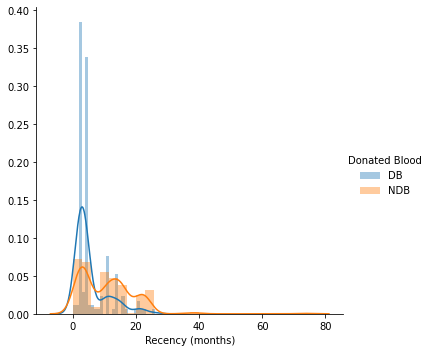

In [ ]:
sns.FacetGrid(blood_transfusion,hue='Donated Blood',height = 5)\
 .map(sns.distplot,'Recency (months)')\
 . add_legend();
plt.show()

###**Observations:**
Here, with 1 or 5 th Recency(months) are more likely to Donate Blood. There are very few chances of donate blood if there are 25 or more Recency(months).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


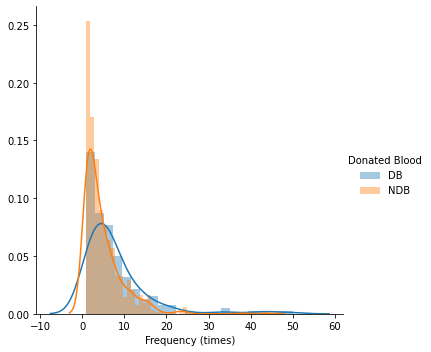

In [ ]:
sns.FacetGrid(blood_transfusion,hue='Donated Blood',height = 5)\
 .map(sns.distplot,'Frequency (times)')\
 . add_legend();
plt.show()

###**Observations:**
We can see here, between 1 to 5 Frequency(total number of donation) are more likely to Not Donate Blood. There are very few chances of donate blood if there are 22 or more Frequency(times).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


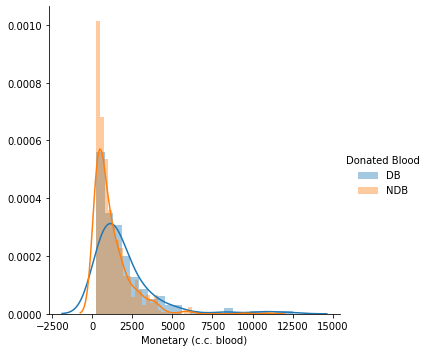

In [ ]:
sns.FacetGrid(blood_transfusion,hue='Donated Blood',height = 5)\
 .map(sns.distplot,'Monetary (c.c. blood)')\
 . add_legend();
plt.show()

###**Observations:**
He/She between 100 to 1200 Monetary(total blood donated in c.c) are more likely to Not Donate Blood. There are more DB and NDB are overlapping.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


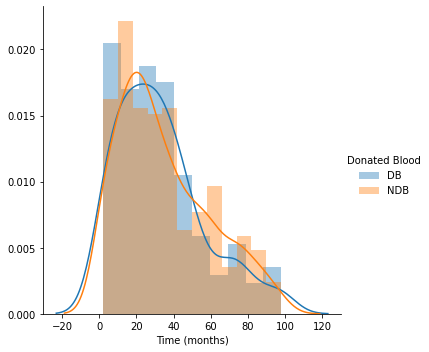

In [ ]:
sns.FacetGrid(blood_transfusion,hue='Donated Blood',height = 5)\
 .map(sns.distplot,'Time (months)')\
 . add_legend();
plt.show()

###**Observations:**
We can see here more DB and NDB are overlapping each other, this will shows that Donated Blood chances are irrespective of a Time(months since first donation).

There is overlapping but we can say that between the 1 to 40 Time(months since first donation) are more chances to donate blood. but also more chances to Not Donated blood.

Time(months) cannot be a parameter to decide he/she donated blood.


###CDF(Cummulative Distribution Finction)


[0.39325843 0.36516854 0.01685393 0.02808989 0.07303371 0.05617978
 0.02808989 0.00561798 0.02808989 0.00561798]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26. ]
***********************************************************
[0.41578947 0.30175439 0.18245614 0.0877193  0.00175439 0.00701754
 0.         0.         0.         0.00350877]
[ 0.   7.4 14.8 22.2 29.6 37.  44.4 51.8 59.2 66.6 74. ]


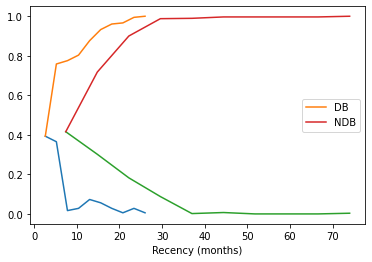

In [ ]:

counts1, bin_edges1 = np.histogram(blood_transfusion_DB["Recency (months)"], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'DB')
plt.xlabel('Recency (months)')
print("***********************************************************")
counts2, bin_edges2 = np.histogram(blood_transfusion_NDB["Recency (months)"], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'NDB')
plt.xlabel('Recency (months)')
plt.legend()
plt.show()

###**Observation**
39.32% of the people(he/she) who have donated blood had Recency(months) in the range of 0–2.6.

#Box plot and Whiskers

Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey. it include the concept of median, percentile, quantile, min and max. This plot also describe the outliers points, witch are those outside the end of the whiskers line.

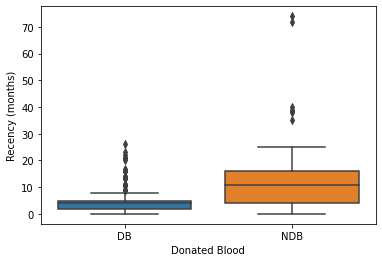

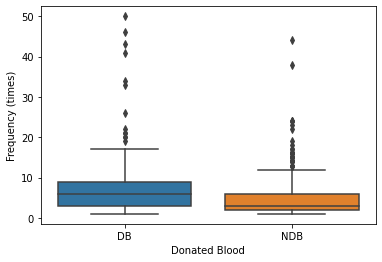

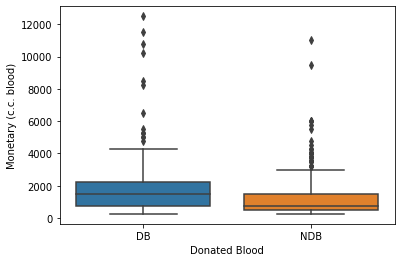

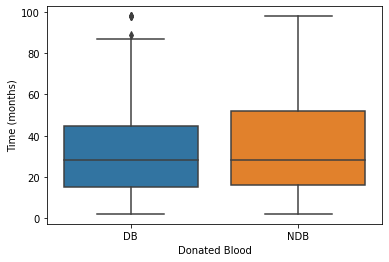

In [ ]:
sns.boxplot(x='Donated Blood',y='Recency (months)',data=blood_transfusion)
plt.show()
sns.boxplot(x='Donated Blood',y='Frequency (times)',data=blood_transfusion)
plt.show()
sns.boxplot(x='Donated Blood',y='Monetary (c.c. blood)',data=blood_transfusion)
plt.show()
sns.boxplot(x='Donated Blood',y='Time (months)',data=blood_transfusion)
plt.show()

#Violin plot 
A violin plot combines the benefits of the previous two plots and simplifies them. Denser regions of the data are fatter, and sparser ones thinner in a violin plot

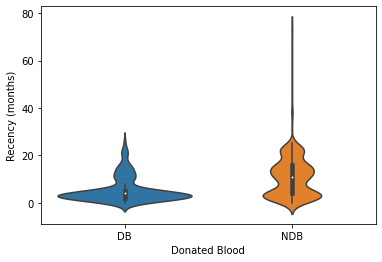

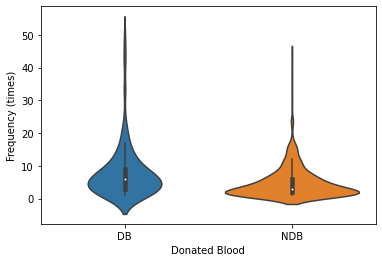

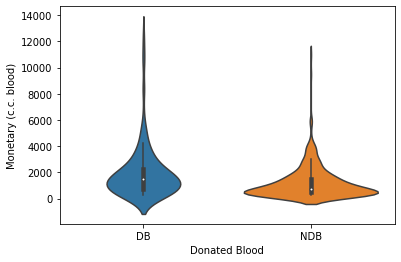

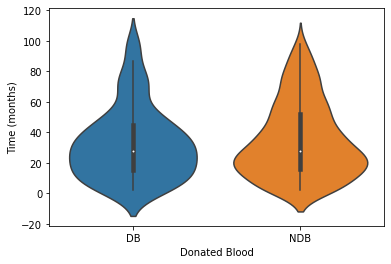

In [ ]:

sns.violinplot(x='Donated Blood',y='Recency (months)',data=blood_transfusion,height = 10)
plt.show()
sns.violinplot(x='Donated Blood',y='Frequency (times)',data=blood_transfusion,height = 10)
plt.show()
sns.violinplot(x='Donated Blood',y='Monetary (c.c. blood)',data=blood_transfusion,height = 10)
plt.show()
sns.violinplot(x='Donated Blood',y='Time (months)',data=blood_transfusion,height = 10)
plt.show()

###**Observations:**

People(he/she) with more than 1 Frequency(total number of donation), and 1000 
Monetary(total blood donated in c.c.) are not likely to donated blood. More the number of Frequency and Monetary, lesser the Donated Blood chances.

A large percentage of he/she who donated blood had 0 to 5 recency(months). 

There were more people(he/she) who donated blood in the time(months) 20 to 35 and after that contineously decrease in the donated blood. Time(months) alone is not an important feature in classificationof the donated blood transfusion.

##Bivariate Analysis

The bivariate Analysis means there are two features. The analysis is related to find the relationship between the two features.

#Scatter Plots

A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables — one plotted along the x-axis and the other plotted along the y-axis.

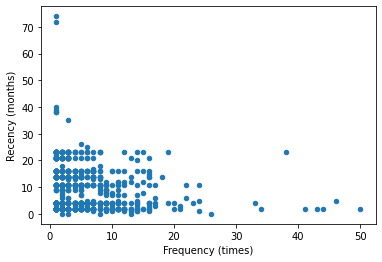

In [ ]:
blood_transfusion.plot(y='Recency (months)', x='Frequency (times)',kind='scatter');
plt.show()

###**Observations:**

For Most of the Donated Blood The Recency(months) is below '25'


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


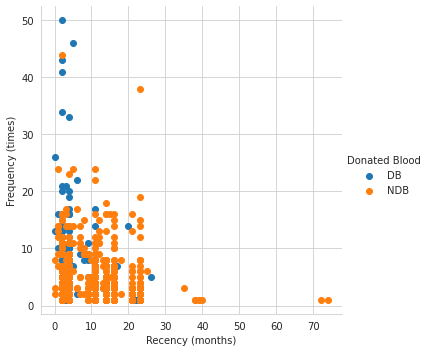

In [ ]:
sns.set_style("whitegrid")

sns.FacetGrid(blood_transfusion,hue='Donated Blood',size=5) \
    .map(plt.scatter,'Recency (months)','Frequency (times)') \
    .add_legend()
plt.show()

###**Obeservation**
Seperating Frequency from Recency is much harder as they have considerable overlaping each other.

Lets see all features pair with pair plot.

#Pair Plots
Note: Without Considering Donated Blood column there are 4 columns-> 4C2 plots ->6 plots

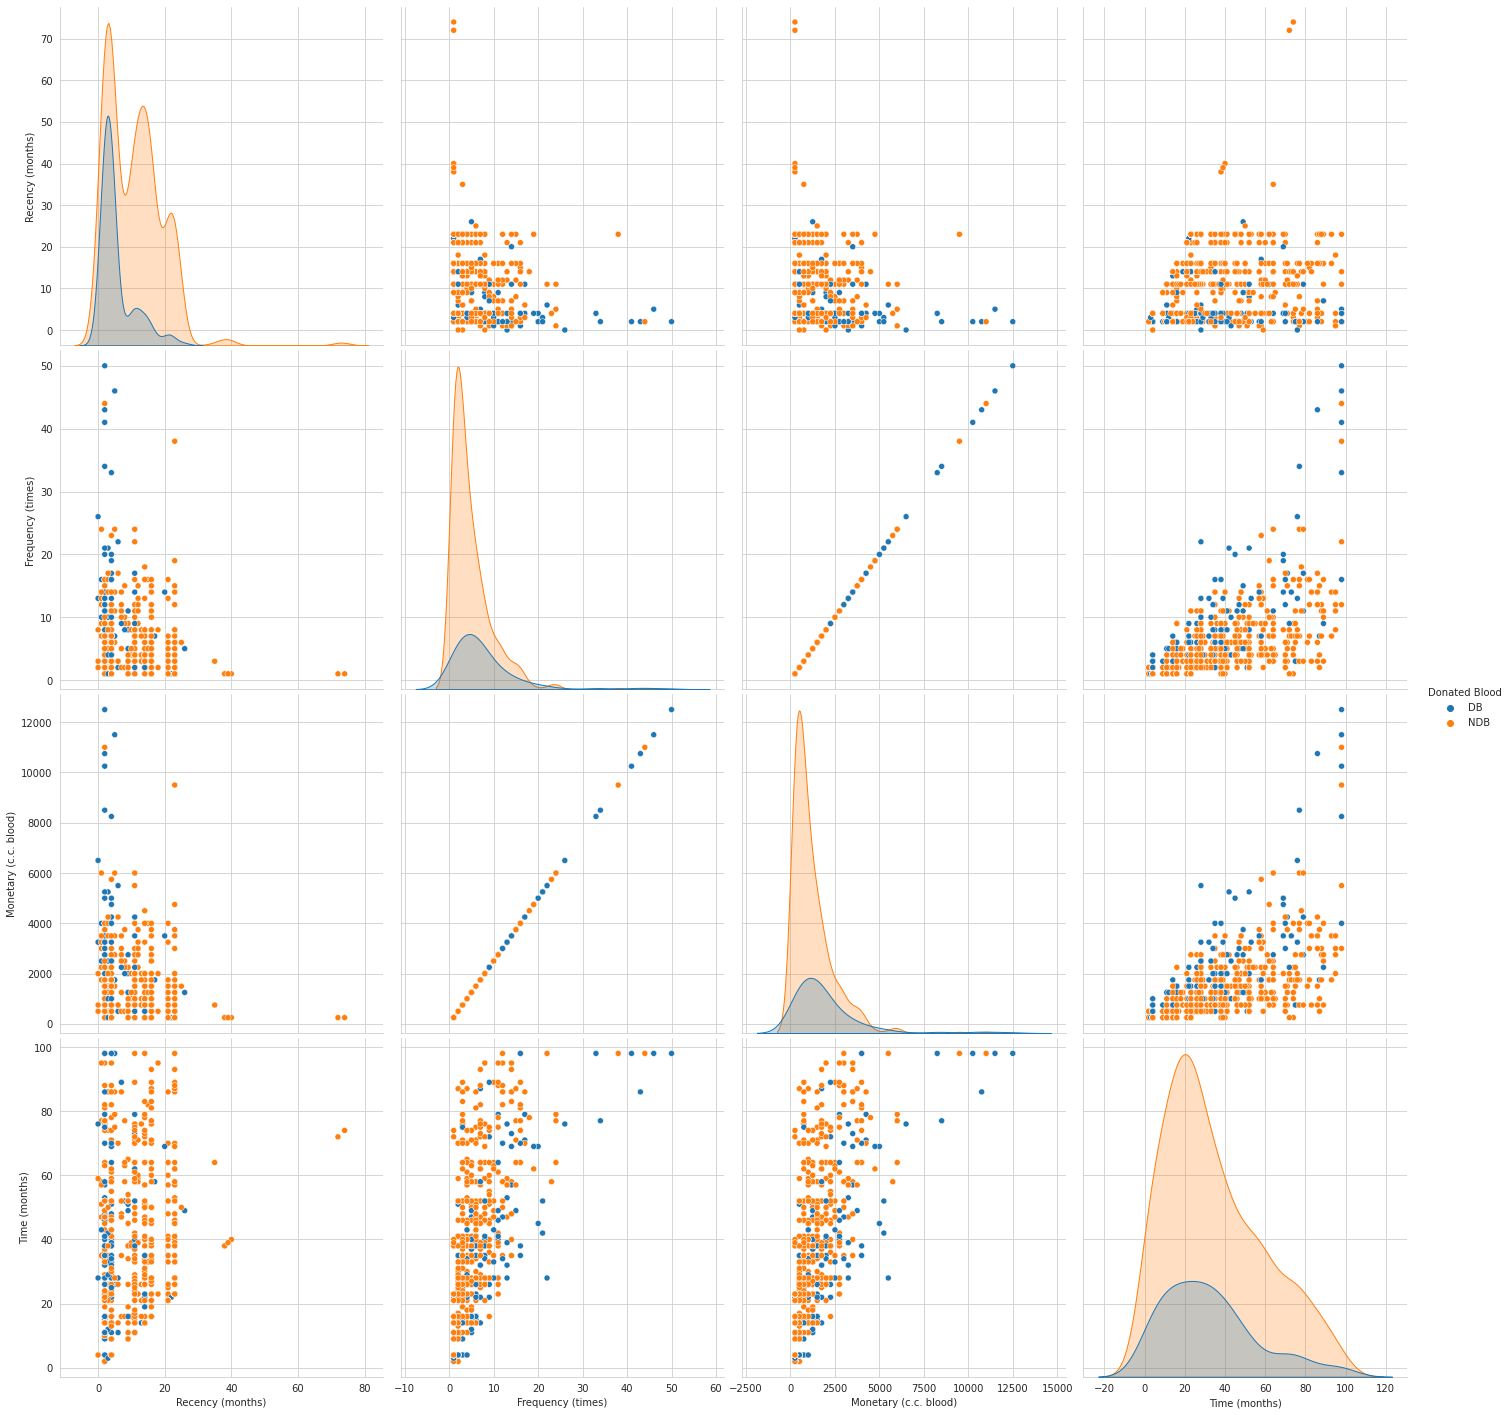

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(blood_transfusion, hue="Donated Blood", height = 5)
plt.show()

###**Observation**
With this plots its difficult to classify the Donated Blood. Because no any graph is giving perticular seperation between data points.

Time(months) and Recency (months) plot are better as compare to other pairs.

##Multivariated Analysis

A contour line or isoline of a function of two variables is a curve along which the function has a constant value. It is a cross-section of the three-dimensional graph.

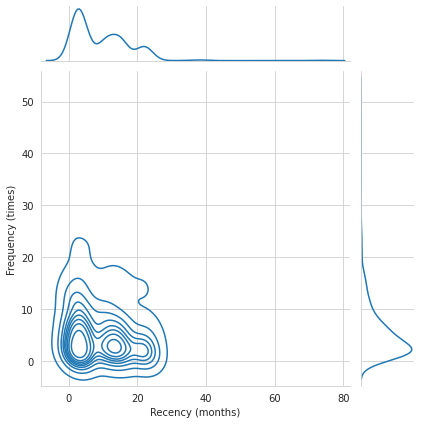

In [ ]:
sns.jointplot(x= 'Recency (months)',kind = 'kde', y='Frequency (times)', data = blood_transfusion)
plt.show()

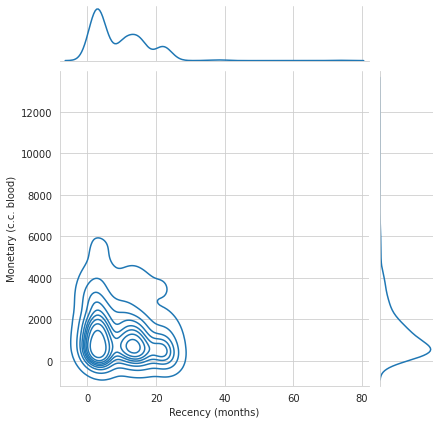

In [ ]:
sns.jointplot(x= 'Recency (months)',kind = 'kde', y='Monetary (c.c. blood)', data = blood_transfusion)
plt.show()

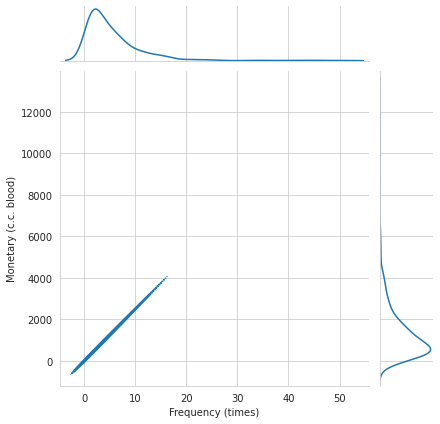

In [ ]:
sns.jointplot(x= 'Frequency (times)',kind = 'kde', y='Monetary (c.c. blood)', data = blood_transfusion)
plt.show()

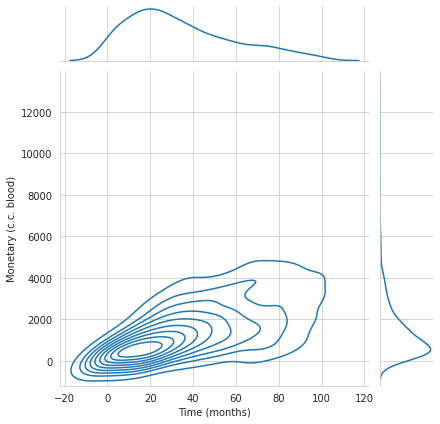

In [ ]:
sns.jointplot(x= 'Time (months)',kind = 'kde', y='Monetary (c.c. blood)', data = blood_transfusion)
plt.show()

###**Observation:**
From 1 to 35 Time(months), more donar, donated blood done on the blood transfusion in the Monetary(c.c. blood) between 100 to 1000.

#Conclusions:


Donated Blood Time(months) and Recency (months) alone are not deciding factors for donated blood in blood transfusion. Yet, people less than 5 Recency(monts) have more chance of donated Blood.

Blood Donated chance is inversely proportional to requency(total number of donation), and Monetary(total blood donated in c.c.).

The objective of classifying whether he/she donated blood in March 2007 or not.of a new people(he/she) based on the given attribute is a difficult task as the data is imbalanced.

#Reference: 

https://towardsdatascience.com/exploratory-data-analysis-habermans-cancer-survival-dataset-c511255d62cb